In [163]:
# Typycal Python tools
import sys
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import os.path

import pylab
from matplotlib import pyplot, cm

from sklearn import svm, grid_search

# To show plots inline
%matplotlib inline

In [164]:
def plot(data):
    positives = data[data[:, 2] == 1]
    negatives = data[data[:, 2] == 0]
    
    pyplot.xlim([25, 105])
    pyplot.ylim([25, 105])
    #pyplot.plot( positives[:, 0], positives[:, 1],'ro',marker='+')
    #pyplot.plot( negatives[:, 0], negatives[:, 1],'yo',marker='o')
    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=50, linewidths=1, label="Not admitted" )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+', s=50, linewidths=2, label="Admitted" )
    # And add legends
    #pyplot.legend()

In [165]:
def PlotData():
    df = pd.read_csv("svm_data.txt" )
    mat = df.values
    plot(mat)

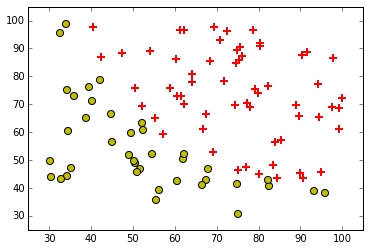

In [166]:
PlotData()

In [167]:
def PlotPosNeg( data ):
    # We separate the given training set into positive (accepted) and negative (not accepted)
    # according to "1" and "0" given in the training set.
    positives  = data[data[:,2] == 1]
    negatives  = data[data[:,2] == 0]
    # We add the X and Y labels...
    pyplot.xlabel("Exam 1 score")
    pyplot.ylabel("Exam 2 score")
    # ... and set the X and Y limit values of the plot.
    pyplot.xlim([25, 105])
    pyplot.ylim([25, 105])
    # We generate the scatter plot according to the separation we just did.
    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=50, linewidths=1, label="Not admitted" )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+', s=50, linewidths=2, label="Admitted" )
    # And add legends
    pyplot.legend()

In [168]:
def PlotDataLabels():
    #mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "/ex6data1.mat" )
    
    #X, Y = mat['X'], mat['y']

    df = pd.read_csv("svm_data.txt" )
    mat = df.values
    #X = mat[:,:2] ; Y = mat[:,2]

    #print type(X) , X.shape, Y.shape

    #quit()

    #plot( c_[X, Y] )
    #plot(mat)
    PlotPosNeg( mat )
    #pyplot.show( block=True )

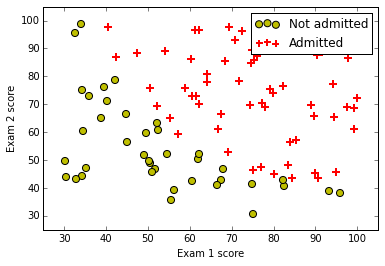

In [169]:
PlotDataLabels()

In [170]:
def PlotBoundary( X, TrainedSVM ):
    kernel = TrainedSVM.get_params()['kernel']
    #
    #
    if kernel == 'linear':
        w = TrainedSVM.dual_coef_.dot( TrainedSVM.support_vectors_ ).flatten()
        xp = np.linspace( min(X[:, 0]), max(X[:, 0]), 100 )
        yp = (-w[0] * xp + TrainedSVM.intercept_) / w[1]
        pyplot.plot( xp, yp, 'b-')
        

    elif kernel == 'rbf':
        x1plot = np.linspace( min(X[:, 0]), max(X[:, 0]), 100 )
        x2plot = np.linspace( min(X[:, 1]), max(X[:, 1]), 100 )
        X1, X2 = np.meshgrid( x1plot, x2plot )
        #vals = np.zeros(shape(X1))
        vals = np.zeros(X1.shape) 
        #for i in range(0, shape(X1)[1]):
        aux_shape = X1.shape
        
        for i in range(aux_shape[1]):
            this_X = np.c_[ X1[:, i], X2[:, i] ]
            vals[:, i] = TrainedSVM.predict( this_X )
        pyplot.contour( X1, X2, vals, colors='blue' )

In [171]:
def PlotBoundary_test( X, TrainedSVM ):
    
    x1plot = np.linspace( min(X[:, 0]), max(X[:, 0]), 100 )
    x2plot = np.linspace( min(X[:, 1]), max(X[:, 1]), 100 )
    X1, X2 = np.meshgrid( x1plot, x2plot )
    #vals = np.zeros(shape(X1))
    vals = np.zeros(X1.shape) 
    #for i in range(0, shape(X1)[1]):
    aux_shape = X1.shape
        
    for i in range(aux_shape[1]):
        this_X = np.c_[ X1[:, i], X2[:, i] ]
        vals[:, i] = TrainedSVM.predict( this_X )
    pyplot.contour( X1, X2, vals, colors='blue' )

In [172]:
def RBFBoundary(Cset,SigmaSet,kernel_type):
    #x1 = array([1, 2, 1])
    #x2 = array([0, 4, -1])
    #sigma = 2

    #print "Gaussian kernel: %f" % GaussKernel( x1, x2, sigma )

    #mat = scipy.io.loadmat( EX_DIRECTORY_PATH + "/ex6data2.mat" )
    #X, y = mat['X'], mat['y']



    df = pd.read_csv("svm_data.txt")
    mat = df.values
    X = mat[:,:2] ; y = mat[:,2]

    plot( mat )
    #pyplot.show( block=True )

    #sigma = 0.01
    sigma = SigmaSet
    #rbf_svm = svm.SVC(C=1, kernel='rbf', gamma = 1.0 / sigma ) # gamma is actually inverse of sigma
    #rbf_svm = svm.SVC(C=Cset, kernel='rbf', gamma = 1.0 / sigma ) # gamma is actually inverse of sigma
    rbf_svm = svm.SVC(C=Cset, kernel=kernel_type, gamma = 1.0 / sigma ) # gamma is actually inverse of sigma
    rbf_svm.fit( X, y.ravel() )

    #rbf_svm.fit( X, y )

    plot( mat )
    PlotBoundary_test( X, rbf_svm )
    #print rbf_svm.get_params()
    
    #pyplot.show( block=True ) 




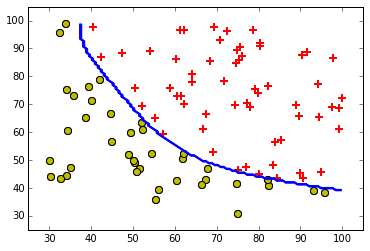

In [183]:
Cset = 1000.
SigmaSet = 1000.
RBFBoundary(Cset,SigmaSet,'rbf')

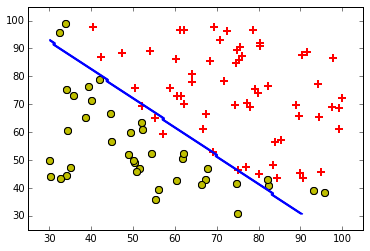

In [161]:
Cset = 10.
SigmaSet = 2000.
RBFBoundary(Cset,SigmaSet,'linear')

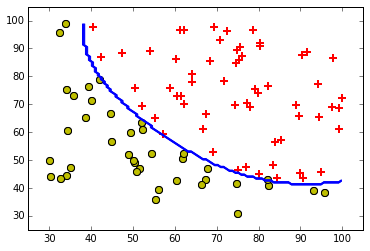

In [162]:
Cset = 10.
SigmaSet = 2000.
RBFBoundary(Cset,SigmaSet,'rbf')

In [149]:
def PlotMalign( data ):
    # We separate the given training set into positive (accepted) and negative (not accepted)
    # according to "1" and "0" given in the training set.
    positives  = data[data[:,2] == 1]
    negatives  = data[data[:,2] == 0]
    # We add the X and Y labels...
    pyplot.xlabel("A")
    pyplot.ylabel("B")
    # ... and set the X and Y limit values of the plot.
    pyplot.xlim([0, 1.05])
    pyplot.ylim([0.35, 1])
    # We generate the scatter plot according to the separation we just did.
    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=50, linewidths=1, label="Not malignant" )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+', s=50, linewidths=2, label="Malignant" )
    # And add legends
    pyplot.legend()

In [150]:
def PlotDataFrame():


    #df = pd.read_csv("tumors_classification.csv" , index_col=False)
    df = pd.read_csv("tumors_classification.csv" , index_col=False)
    mat = df.values[:,1:]
    mat[:,2] = mat[:,2].astype(int)
    #X = mat[:,:2] ; Y = mat[:,2]

    #print type(X) , X.shape, Y.shape

    #quit()

    #plot( c_[X, Y] )
    #plot(mat)
    PlotMalign( mat )
    
    return df
    #pyplot.show( block=True )

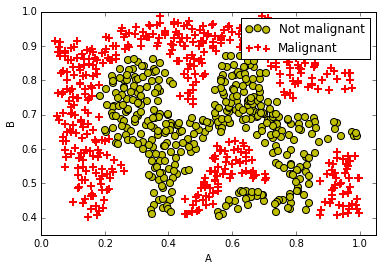

In [151]:
df = PlotDataFrame()

#### Raw work

In [87]:
import sys
import scipy.misc, scipy.io, scipy.optimize

In [44]:
mat = scipy.io.loadmat( "ex6data2.mat" )

In [45]:
X, y = mat['X'], mat['y']

In [115]:
#y
#X[:,0]
#pd.DataFrame(np.c_[X,y])

In [112]:
pdAux = pd.DataFrame()

In [113]:
pdAux['A'] = X[:,0]
pdAux['B'] = X[:,1]
pdAux['malignant'] = y.astype(int)

In [85]:
pdAux.index = range(1,864)
#pdAux.index.name = 'Record'

In [114]:
pdAux.head()

,A,B,malignant
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [96]:
pdAux.to_csv("tumors_classification.csv")